In [291]:
import time
import numpy as np
import matplotlib.pyplot as plt
import utils_img_rec as ut

import pathlib

import cv2
import tqdm
import os

import pickle
inicio = time.time()

In [292]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

In [293]:
def detect_faces(img):
    
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)
    #faces_detected = face_cascade.detectMultiScale(img)



    if len(faces_detected) > 0:
        (x, y, w, h) = faces_detected[0]
        print(len(faces_detected))

        img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb, cmap='gray')
        plt.show()
    else:
        print("Nenhuma face detectada")

def gaussian_blur(img):
    #img = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

    #img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    smooth = cv2.GaussianBlur(gray, (5, 5), 0)
    division = cv2.divide(gray, smooth, scale=255)

    plt.imshow(smooth, cmap='gray')
    plt.show()
    return smooth

def canny_p(img):
    
    can = cv2.Canny(img, 10, 100)

    img_rgb = cv2.cvtColor(can, cv2.COLOR_BGR2RGB)

    plt.imshow(img_rgb, cmap='gray')
    plt.show()
    return can


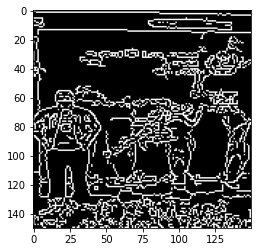

erick-antigo (1).jpg
Nenhuma face detectada


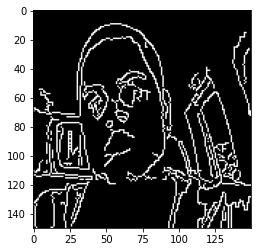

erick-antigo (1).png
Nenhuma face detectada


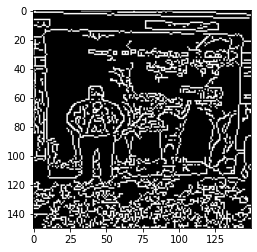

erick-antigo (2).jpg
Nenhuma face detectada


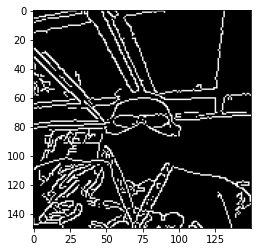

erick-antigo (3).jpg
Nenhuma face detectada


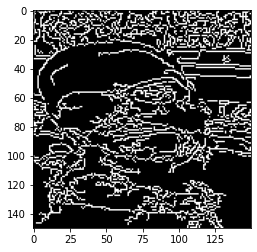

erick-antigo (5).jpg
Nenhuma face detectada


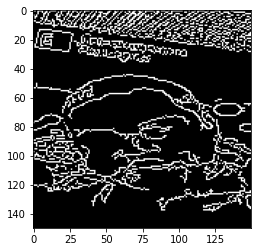

erick-antigo (6).jpg
Nenhuma face detectada


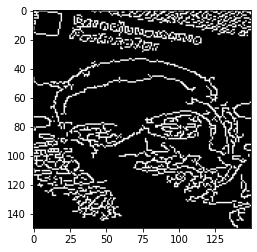

erick-antigo (7).jpg
Nenhuma face detectada


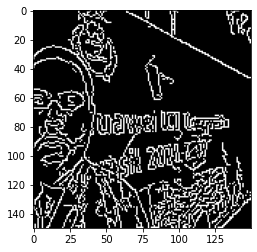

erick-antigo (8).jpg
Nenhuma face detectada


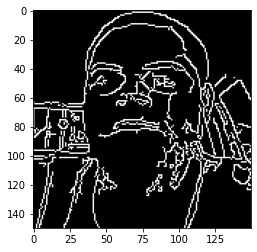

WhatsApp Image 2022-07-09 at 16.04.48.jpeg
Nenhuma face detectada
imgs_num: 9


In [294]:
#path = "../../../_DATA_/image/face/faustao"

path = "../../../_DATA_/image/faces-personal"

lista_dir = os.listdir(path)
i=0

for img_name in lista_dir:
    i+=1
#   img_array = cv2.imread(os.path.join(path,img_name) ,cv2.IMREAD_GRAYSCALE)
    img_array = cv2.imread(os.path.join(path,img_name) ,cv2.cv2.IMREAD_COLOR)
    img_array = cv2.resize(img_array, (150, 150))
    img_array = canny_p(img_array)


    #img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)


    
    print(img_name)

    detect_faces(img_array)


print(f'imgs_num: {i}')

In [295]:
#DATADIR = r"..\..\..\_DATA_\image\face\faustao\faustao.jpg"
DATADIR = "ratinho.jpg"

path = pathlib.Path(DATADIR)
print(path)

ratinho.jpg


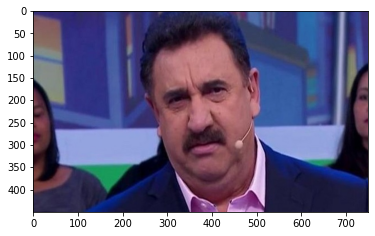

In [296]:
img = cv2.imread(str(path) ,cv2.cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()

In [297]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

faces_detected = face_cascade.detectMultiScale(img, scaleFactor=1.1, minNeighbors=5)

1


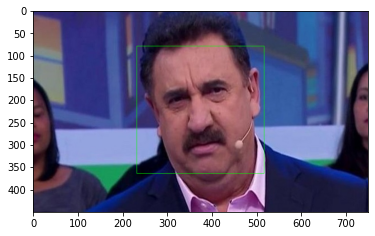

In [298]:
print(len(faces_detected))
(x, y, w, h) = faces_detected[0]
img = cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()

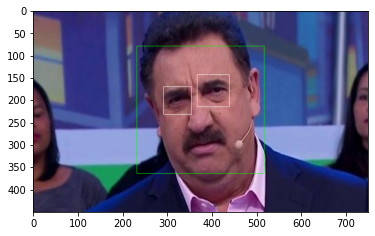

In [299]:
eyes = eyes_cascade.detectMultiScale(img[y:y+h, x:x+w])
for (ex, ey, ew, eh) in eyes:
    img = cv2.rectangle(img, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (255, 255, 255), 1)

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()
#rodar a imagem para alinhar os 2 olhos

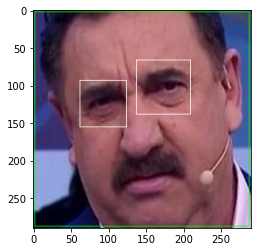

In [300]:
p=3 #padding, margem
img = img[y-p+1:y+h+p, x-p+1:x+w+p]


img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb, cmap='gray')
plt.show()
